In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import random as r
from timeit import default_timer as timer

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Model training 

In [2]:
import pandas as pd
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/diabetes.csv',sep=" ", header=None)
print(data.shape)
data.head() # Preview Data

(768, 10)


,0,1,2,3,4,5,6,7,8,9
0,-1,NaN,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0
1,1,NaN,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0
2,-1,NaN,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0
3,1,NaN,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
4,-1,NaN,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
0    768 non-null int64
1    0 non-null float64
2    768 non-null float64
3    768 non-null float64
4    768 non-null float64
5    768 non-null float64
6    768 non-null float64
7    768 non-null float64
8    768 non-null float64
9    768 non-null float64
dtypes: float64(9), int64(1)
memory usage: 60.1 KB


In [4]:
diabetes = '/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/diabetes.csv'
data=np.loadtxt(diabetes, unpack=True)
data.shape

(9, 768)

## Model training

In [0]:
#Converting the data to X and Y
data=np.array(data,dtype=float)
A=np.transpose(data[1:])[0:500]
(n,m)=A.shape
Y=np.transpose(data[0])[0:500]
T=[[0 for x in range(m+1)] for y in range(n)]
X=np.array(T,dtype=float)
for i in range(n):
    for j in range(m):
        X[i][j]=A[i][j]
for i in range(n):
    X[i][m]=1

In [0]:
def subdiff(w,matrix,col):
    (n,m)= matrix.shape
    u=[1 for i in range (m)]
    v=0.0001*w
    for i in range(n):
        v+= -1/n*col[i]*np.transpose(matrix[i][:])/(1+np.exp(col[i]*np.matmul(np.transpose(w),matrix[i][:])))
    return v

In [0]:
def fvalue(matrix,col,w):
    (n,m)=matrix.shape
    v=0.0001/2*np.linalg.norm(w,ord=2)**2
    for i in range(n):
        v += 1/n*np.log(1+np.exp(-col[i]*np.matmul(np.transpose(w),matrix[i][:])))
    return v

In [0]:
## Subgradient descent method
def regress(matrix,col):
    (n,m)= matrix.shape
    w = np.ones(m)
    fbest=100*np.ones(10001)
    value=np.ones(10000)
    for i in range(10000):
        v=subdiff(w,matrix,col) #choose a subgradient
        w += -1/np.sqrt(i+1)*v# x^{k+1}=x^k-f(x^k)/(norm(v)^2)*v
        value[i]=fvalue(X,Y,w) #compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
        else:
            fbest[i+1]=fbest[i]
    return (w, value, fbest)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


time= 86.8480586249998
value= [        inf         inf         inf ... 34.60658806 12.90794865
 25.7349808 ]
fbest= [100.         100.         100.         ...  12.91114918  12.90794865
  12.90794865]


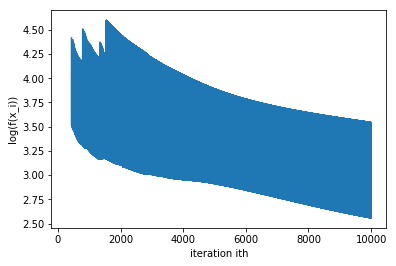

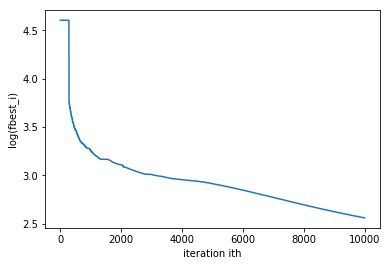

In [9]:
start = timer()
(gdm,value, fbest)=regress(X,Y)
end = timer()
print('time=',end - start)
#print('x=',x)
print('value=',value)
print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i)')
plt.show()

### Stochastic subgradient descent method

In [0]:
def subdiffsto(w,matrix,col):
    (n,m)= X.shape
    v=0.0001*w-1/n*col*np.transpose(matrix)/(1+np.exp(col*np.matmul(np.transpose(w),matrix)))
    return v

In [0]:
##Stochastic subgradient descent method
def storegress(matrix,col):
    (n,m)= matrix.shape
    w = np.ones(m)
    fbest=100*np.ones(10001)
    a=np.ones(m)
    value=np.ones(10000)
    for i in range(10000):
        j=r.randint(0,n-1) #choose randomly j in [0,n-1]
        v=subdiffsto(w,matrix[j][:],col[j]) #choose a subgradient of |a_j'x-b_j|
        w += -1/np.sqrt(i+1)*v #x^{k+1}=x^k-1/(norm(v)*sqrt(i+1))*v
        value[i]=fvalue(X,Y,w) #compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
            a+=-a+w
        else:
            fbest[i+1]=fbest[i]
    return (a, w, value, fbest)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


time= 33.90228942400063
value= [       inf        inf        inf ... 1.25162967 1.22335991 1.22351477]


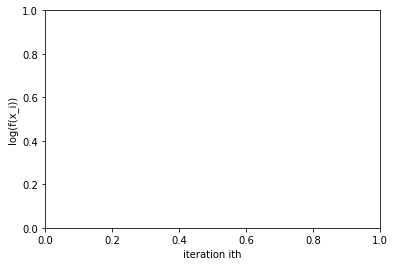

fbest= [100.         100.         100.         ...   1.21834899   1.21834899
   1.21834899]


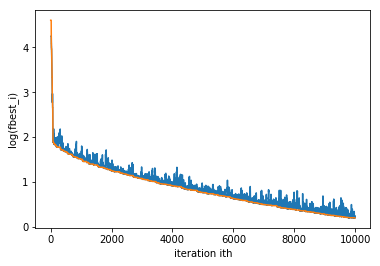

In [12]:
start = timer()
(w2best,stogdm,value, fbest)=storegress(X,Y)
end = timer()
print('time=',end - start)
print('value=',value)
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value[1:]))
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i)')
plt.show()

### Model testing

In [13]:
B=np.transpose(data[1:])[500:-1]
(n,m)=B.shape
print(B.shape)
C=np.transpose(data[0])[500:-1]
Test=[[0 for x in range(m+1)] for y in range(n)]
Xtest=np.array(Test)
for i in range(n):
    for j in range(m):
        Xtest[i][j]=B[i][j]
for i in range(n):
    Xtest[i][m]=1
#prettyP(Xtest)

(267, 8)


In [17]:
y1=np.matmul(Xtest,gdm)
y2=np.matmul(Xtest,w2best)
for i in range(n):
    if y1[i]>0:
        y1[i]=1
    else:
        y1[i]=-1
for i in range(n):
    if y2[i]>0:
        y2[i]=1
    else:
        y2[i]=-1
print(y1)
print(y2)
count1=0
for i in range(n):
    if y1[i]==C[i]:
        count1+=1
eff1=count1/n
count2=0
for i in range(n):
    if y2[i]==C[i]:
        count2+=1
eff2=count2/n
print('efficientcy1=',eff1)
print('efficientcy2=',eff2)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

From the result, we can see that logistic regression and svm perform similar in both method.